In [9]:
import numpy as np
import pandas as pd

In [10]:
df=pd.read_csv("/home/devjith/Luminar/Machine Learning/files/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
df.shape

(200, 5)

In [12]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [15]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
df.drop(['Gender'],axis=1,inplace=True)
df.drop(['CustomerID'],axis=1,inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [17]:
x=df.iloc[:,:]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [18]:
#clusters
#Elbow point
from sklearn.cluster import KMeans
wcss=[] #empty
for i in range(1,11):
    data=KMeans(n_clusters=i,init='k-means++',random_state=42)
    data.fit(x)
    wcss.append(data.inertia_)


In [19]:
wcss

[308812.77999999997,
 221087.19627192983,
 158744.97108013934,
 104366.15145556198,
 97211.84353980474,
 68275.94428646985,
 51448.361262593244,
 44640.028048530425,
 42081.85530868531,
 38378.73890793208]

Text(0.5, 1.0, 'Elbow points')

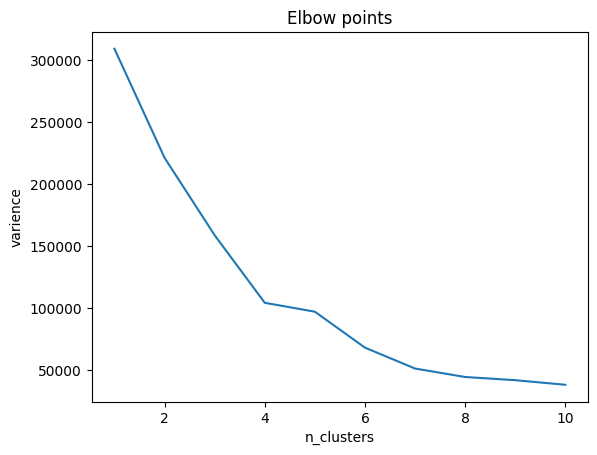

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel('n_clusters')
plt.ylabel('varience')
plt.title('Elbow points')

In [21]:
#number of clusters =7   values range from (0,6)
data1=KMeans(n_clusters=7,init='k-means++',random_state=42)
y_pred=data1.fit_predict(x)
y_pred

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 4, 6, 4, 6, 4, 3, 4, 3, 4,
       6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [22]:
#measure for evaluating clusters:
#Silhouette score
#Davis-Bouldin index
from sklearn.metrics import silhouette_score,davies_bouldin_score
score=silhouette_score(x,y_pred)
score

0.4420336177238127

In [23]:
score1=davies_bouldin_score(x,y_pred)
score1

0.7683683765470936

In [24]:
x['clusters']=y_pred
x

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [25]:
#for predicting clusters on another set of age
x1=x.iloc[:,:-1].values
y1=x.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)
x_train

array([[ 32,  87,  63],
       [ 27,  60,  50],
       [ 21,  30,  73],
       [ 58,  20,  15],
       [ 21,  33,  81],
       [ 50,  67,  57],
       [ 48,  39,  36],
       [ 36, 103,  85],
       [ 68,  59,  55],
       [ 44,  73,   7],
       [ 33,  42,  60],
       [ 40,  71,  95],
       [ 19,  81,   5],
       [ 24,  38,  92],
       [ 51,  67,  43],
       [ 19,  64,  46],
       [ 45,  28,  32],
       [ 35,  74,  72],
       [ 23,  62,  41],
       [ 19,  63,  54],
       [ 20,  16,   6],
       [ 40,  54,  48],
       [ 50,  40,  55],
       [ 28, 101,  68],
       [ 32, 103,  69],
       [ 48,  54,  46],
       [ 29,  79,  83],
       [ 42,  34,  17],
       [ 34, 103,  23],
       [ 19,  46,  55],
       [ 46,  25,   5],
       [ 32,  75,  93],
       [ 49,  62,  48],
       [ 18,  33,  92],
       [ 35,  19,  99],
       [ 47, 120,  16],
       [ 30,  78,  73],
       [ 35,  18,   6],
       [ 35,  28,  61],
       [ 27,  67,  56],
       [ 31,  17,  40],
       [ 53,  33

In [27]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([6, 2, 5, 3, 3, 6, 6, 3, 3, 2, 0, 3, 4, 6, 3, 4, 0, 3, 0, 6, 3, 5,
       3, 6, 6, 0, 6, 0, 4, 6, 2, 5, 0, 6, 3, 0, 4, 4, 3, 0, 0, 1, 5, 5,
       6, 1, 2, 2, 4, 0, 6, 4, 2, 3, 0, 0, 3, 0, 3, 0], dtype=int32)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
score

0.9666666666666667

In [29]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6
           3       0.86      1.00      0.92        12
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         5
           6       1.00      0.86      0.92        14

    accuracy                           0.97        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.97      0.97      0.97        60



In [30]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)
y_pred1

array([6, 2, 5, 3, 3, 6, 6, 3, 3, 2, 6, 3, 4, 6, 3, 4, 0, 3, 0, 6, 3, 5,
       3, 6, 6, 0, 6, 0, 4, 3, 2, 5, 0, 6, 3, 0, 4, 4, 3, 0, 0, 1, 5, 5,
       6, 1, 2, 2, 4, 0, 6, 4, 2, 3, 0, 0, 3, 0, 3, 0], dtype=int32)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1=confusion_matrix(y_test,y_pred1)
score1=accuracy_score(y_test,y_pred1)
score1

0.9333333333333333